In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
data_path=Path("../Data/FeatureEngineering/feature_engineered_data.csv")
df = pd.read_csv(data_path)
with open('../Data/FeatureEngineering/feature_engineering_metadata.pkl', 'rb') as f:
    loaded_metadata = pickle.load(f)
print(loaded_metadata)

{'class_labels': {'Apple': np.int64(0), 'Banana': np.int64(1), 'Burger': np.int64(2), 'Donut': np.int64(3), 'Ice Cream': np.int64(4), 'Pasta': np.int64(5), 'Pizza': np.int64(6), 'Salad': np.int64(7), 'Steak': np.int64(8), 'Sushi': np.int64(9)}, 'classes': ['Apple', 'Banana', 'Burger', 'Donut', 'Ice Cream', 'Pasta', 'Pizza', 'Salad', 'Steak', 'Sushi'], 'selected_features': ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_breakfast', 'Meal_dinner', 'Meal_lunch', 'Meal_snack', 'Prep_baked', 'Prep_fried', 'Prep_grilled', 'Prep_raw'], 'trained_scaler': StandardScaler(), 'label_encoder': LabelEncoder()}


Logistic Regression Results
Accuracy train: 0.9958
Accuracy test: 0.9944
Precision: 0.9944
Recall: 0.9944
F1-score: 0.9944

Classification Report:
               precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       311
      Banana       0.99      0.99      0.99       222
      Burger       0.99      0.99      0.99       969
       Donut       1.00      1.00      1.00       929
   Ice Cream       1.00      1.00      1.00       606
       Pasta       1.00      1.00      1.00       825
       Pizza       0.99      0.99      0.99      1153
       Salad       1.00      1.00      1.00       199
       Steak       1.00      1.00      1.00       393
       Sushi       1.00      1.00      1.00       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Scores for each fold: [0.99601752 0.99442453 0.99542015 0.99382716 0.99442342]
Average Accura

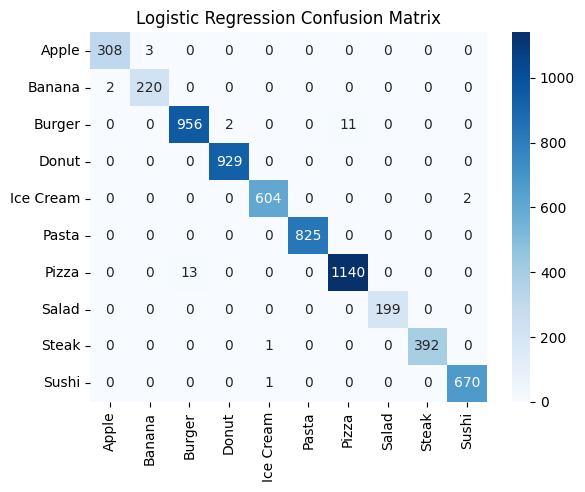

{'test_accuracy': 0.9944249761070405, 'train_accuracy': 0.9957784061491896, 'Precision': 0.9944242051821791, 'Recall': 0.9944249761070405, 'F1-score': 0.9944238182183123, 'classification_report': '              precision    recall  f1-score   support\n\n       Apple       0.99      0.99      0.99       311\n      Banana       0.99      0.99      0.99       222\n      Burger       0.99      0.99      0.99       969\n       Donut       1.00      1.00      1.00       929\n   Ice Cream       1.00      1.00      1.00       606\n       Pasta       1.00      1.00      1.00       825\n       Pizza       0.99      0.99      0.99      1153\n       Salad       1.00      1.00      1.00       199\n       Steak       1.00      1.00      1.00       393\n       Sushi       1.00      1.00      1.00       671\n\n    accuracy                           0.99      6278\n   macro avg       0.99      0.99      0.99      6278\nweighted avg       0.99      0.99      0.99      6278\n', 'cross_val_scores': array(

In [5]:
# 1. Prepare Data
from sklearn.metrics import recall_score


from sklearn.metrics import precision_score


X = df.drop(columns=['Food_Name_Encoded'])
y = df['Food_Name_Encoded']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 4. Predict and Evaluate
y_pred = model.predict(X_test)
target_names = loaded_metadata['classes']

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Logistic Regression Results")
print(f"Accuracy train: {train_accuracy:.4f}")
print(f"Accuracy test: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", class_report)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

results = {
    "test_accuracy": test_accuracy,
    "train_accuracy": train_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "classification_report": class_report,
    "cross_val_scores": scores,
    "cross_val_mean": scores.mean(),
    "cross_val_std": scores.std()
}
print(results)

In [6]:
data_processing_metadata_path = Path("../Data/DataProcessing/metadata.pkl")
with open(data_processing_metadata_path, 'rb') as f:
    loaded_dataprocessing_metadata = pickle.load(f)
feature_engineering_metadata_path = Path("../Data/FeatureEngineering/feature_engineering_metadata.pkl")
with open(feature_engineering_metadata_path, 'rb') as f:
    loaded_featureengineering_metadata = pickle.load(f)

def predict_food(model,data):
    input_data = {}
    for feature in loaded_featureengineering_metadata['selected_features']:
        if feature not in data:
            input_data[feature] = 0
        else:
            input_data[feature] = data[feature]
    
    input_df = pd.DataFrame([input_data])
    for i in loaded_dataprocessing_metadata['numerical_features']:
        lower_bound, upper_bound = loaded_dataprocessing_metadata['outlier_boundaries'][i]
        input_df[i] = np.clip(input_df[i], lower_bound, upper_bound)
    input_df[loaded_dataprocessing_metadata['numerical_features']] = loaded_featureengineering_metadata['trained_scaler'].transform(input_df[loaded_dataprocessing_metadata['numerical_features']])
    print(input_df)
    prediction_encoded = model.predict(input_df)
    prediction_label = loaded_featureengineering_metadata['label_encoder'].inverse_transform(prediction_encoded)
    print(f"Predicted Food Item: {prediction_encoded[0]} - {prediction_label[0]}")
    
predict_food(model,{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 0,'Prep_raw': 1})

   Calories   Protein       Fat    Carbs     Sugar     Fiber    Sodium  \
0 -0.789107 -1.479211 -1.861875  0.09932  3.415151 -1.372714 -1.167916   

   Cholesterol  Glycemic_Index  Water_Content  ...  Is_Vegan  Is_Gluten_Free  \
0    -1.460341       -2.068807       1.063572  ...         0               0   

   Meal_breakfast  Meal_dinner  Meal_lunch  Meal_snack  Prep_baked  \
0               0            0           0           1           0   

   Prep_fried  Prep_grilled  Prep_raw  
0           0             0         1  

[1 rows x 21 columns]
Predicted Food Item: 4 - Ice Cream


In [7]:
LogisticRegression_model={
    'model':model,
    "results": results
}
with open('../Models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(LogisticRegression_model, f)

In [9]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from predict import predict_food
predict_food(model,{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 1,'Prep_raw': 1})
test=pd.DataFrame([{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 1,'Prep_raw': 0}])

   Calories   Protein       Fat    Carbs     Sugar     Fiber    Sodium  \
0 -0.789107 -1.479211 -1.861875  0.09932  3.415151 -1.372714 -1.167916   

   Cholesterol  Glycemic_Index  Water_Content  ...  Is_Vegan  Is_Gluten_Free  \
0    -1.460341       -2.068807       1.063572  ...         0               0   

   Meal_breakfast  Meal_dinner  Meal_lunch  Meal_snack  Prep_baked  \
0               0            0           0           1           0   

   Prep_fried  Prep_grilled  Prep_raw  
0           0             1         1  

[1 rows x 21 columns]


In [10]:
prediction=model.predict(test)
print("prediction result:",prediction[0])
# 1. Get the probabilities
probs = model.predict_proba(test)[0]
food_names = ["Apple", "Banana", "Burger", "Donut", "Ice Cream", "Pasta", "Pizza", "Salad", "Steak", "Sushi"]

result_list = [
    {"label": food_names[i], "probability": round(float(probs[i]), 4)} 
    for i in range(len(probs))
]

test = [
    {"label": label, "probability": round(float(prob), 4)} 
    for label, prob in zip(model.classes_, probs)
]

# 3. Sort by probability
result_list = sorted(result_list, key=lambda x: x['probability'], reverse=True)

print(result_list)
print(test)

prediction result: 0
[{'label': 'Apple', 'probability': 1.0}, {'label': 'Banana', 'probability': 0.0}, {'label': 'Burger', 'probability': 0.0}, {'label': 'Donut', 'probability': 0.0}, {'label': 'Ice Cream', 'probability': 0.0}, {'label': 'Pasta', 'probability': 0.0}, {'label': 'Pizza', 'probability': 0.0}, {'label': 'Salad', 'probability': 0.0}, {'label': 'Steak', 'probability': 0.0}, {'label': 'Sushi', 'probability': 0.0}]
[{'label': np.int64(0), 'probability': 1.0}, {'label': np.int64(1), 'probability': 0.0}, {'label': np.int64(2), 'probability': 0.0}, {'label': np.int64(3), 'probability': 0.0}, {'label': np.int64(4), 'probability': 0.0}, {'label': np.int64(5), 'probability': 0.0}, {'label': np.int64(6), 'probability': 0.0}, {'label': np.int64(7), 'probability': 0.0}, {'label': np.int64(8), 'probability': 0.0}, {'label': np.int64(9), 'probability': 0.0}]
